In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import datetime as dt
import numpy as np 

In [2]:
df=pd.read_csv('Nigeria Covid update.csv')

In [3]:
#Creating a Copy
Nigeria_Data=df.copy()

In [4]:
Nigeria_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 69 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  1273 non-null   int64  
 1   iso_code                                    1273 non-null   object 
 2   continent                                   1273 non-null   object 
 3   location                                    1273 non-null   object 
 4   date                                        1273 non-null   object 
 5   population                                  1273 non-null   int64  
 6   new_cases                                   1273 non-null   float64
 7   new_cases_smoothed                          1268 non-null   float64
 8   total_deaths                                1193 non-null   float64
 9   new_deaths                                  1273 non-null   float64
 10  new_deaths_s

In [5]:
#Filtering important Column
Nigeria_Data=Nigeria_Data.loc[:,[
                                'date','new_cases','new_cases_smoothed',	'total_deaths',
                                'new_deaths','new_deaths_smoothed',
                                'total_cases_per_million','new_cases_per_million',
                                'new_cases_smoothed_per_million','total_deaths_per_million',
                                'new_deaths_per_million','new_deaths_smoothed_per_million','months'
]]

In [6]:
Nigeria_Data['date']

0       2020-01-03
1       2020-01-04
2       2020-01-05
3       2020-01-06
4       2020-01-07
           ...    
1268    2023-06-24
1269    2023-06-25
1270    2023-06-26
1271    2023-06-27
1272    2023-06-28
Name: date, Length: 1273, dtype: object

In [7]:
#cleaing date
Nigeria_Data['date']=pd.to_datetime(Nigeria_Data['date'])


In [8]:
Nigeria_Data['year']=Nigeria_Data['date'].dt.year

In [9]:
Years_Count=Nigeria_Data['year'].unique()
Years_Count.tolist()

[2020, 2021, 2022, 2023]

In [10]:
YearlyTrend=(
    Nigeria_Data.groupby('year')
    ['new_cases'].sum().reset_index(name='Total_new_Cases')
    
)
YearlyTrend

,year,Total_new_Cases
0,2020,86576.0
1,2021,154937.0
2,2022,24937.0
3,2023,225.0


__YEARLY TREND OF COVID 2021-2023__

Text(0.5, 1.0, 'COVID TREND IN NIGERIA 2021-2023')

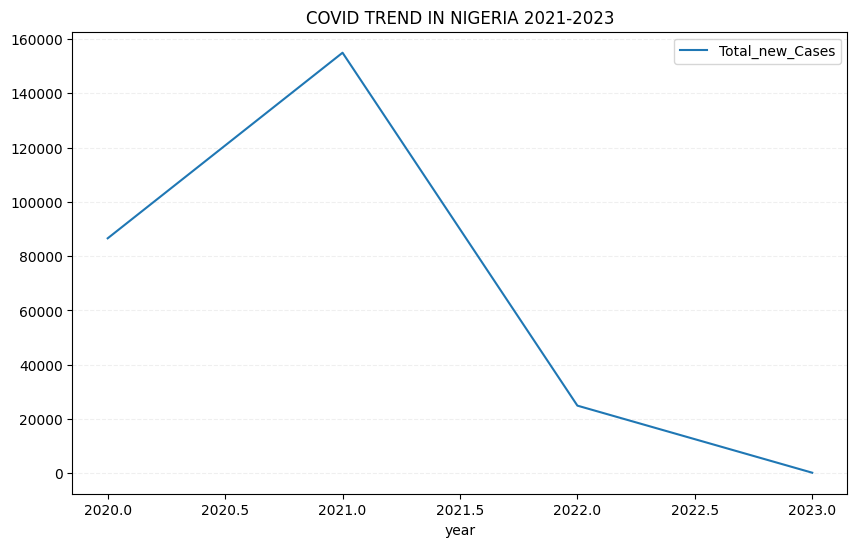

In [11]:
YearlyTrend.plot(kind='line',x='year',y='Total_new_Cases',figsize=(10,6))
plt.tight_layout
plt.grid(axis='y',linestyle='--',alpha=0.2)
plt.title("COVID TREND IN NIGERIA 2021-2023")

In [12]:
#Data per Year
Trend_Per_Year={
    year:Nigeria_Data[Nigeria_Data['year']==year] for year in Years_Count
}

Covid_2020=Trend_Per_Year[2020]
Covid_2021=Trend_Per_Year[2021]
Covid_2022=Trend_Per_Year[2022]
Covid_2023=Trend_Per_Year[2023]


In [13]:
def grouped_months(yearData):
    monthOrder=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    yearData=yearData.groupby('months')['new_cases'].sum().reset_index(name='Count')
    #pivot_table(columns='months',values='new_cases',aggfunc='sum')
    #yearData=yearData.reindex(columns=monthOrder,fill_value=0)
    yearData=yearData.set_index('months').reindex(monthOrder,fill_value=0).reset_index()
    return yearData
    
    

In [14]:
Covid_2020_MonthlyTrend=grouped_months(Covid_2020)
Covid_2021_MonthlyTrend=grouped_months(Covid_2021)
Covid_2022_MonthlyTrend=grouped_months(Covid_2022)
Covid_2023_MonthlyTrend=grouped_months(Covid_2023)
Covid_2023_MonthlyTrend


,months,Count
0,Jan,13.0
1,Feb,135.0
2,Mar,62.0
3,Apr,15.0
4,May,0.0
5,Jun,0.0
6,Jul,0.0
7,Aug,0.0
8,Sep,0.0
9,Oct,0.0


In [15]:
def plot_months(groupedData,year):
    groupedData=[
            groupedData.plot(kind='line',marker='*',figsize=(10,5),x='months',y='Count'),
            
            plt.title(f'MONTHLY COVID -19 NEW CASES IN {year}'),
            plt.xlabel('Month'),
            plt.ylabel('New Cases'),
            plt.grid(True, linestyle='--'),
            plt.xticks(rotation=45),
            plt.tight_layout(),
            plt.show()
        ]
    
    

In [16]:
Covid_2020_MonthlyTrend

,months,Count
0,Jan,0.0
1,Feb,1.0
2,Mar,135.0
3,Apr,1592.0
4,May,8127.0
5,Jun,15278.0
6,Jul,17556.0
7,Aug,11176.0
8,Sep,4782.0
9,Oct,4044.0


__COVID TREND FOR 2020__

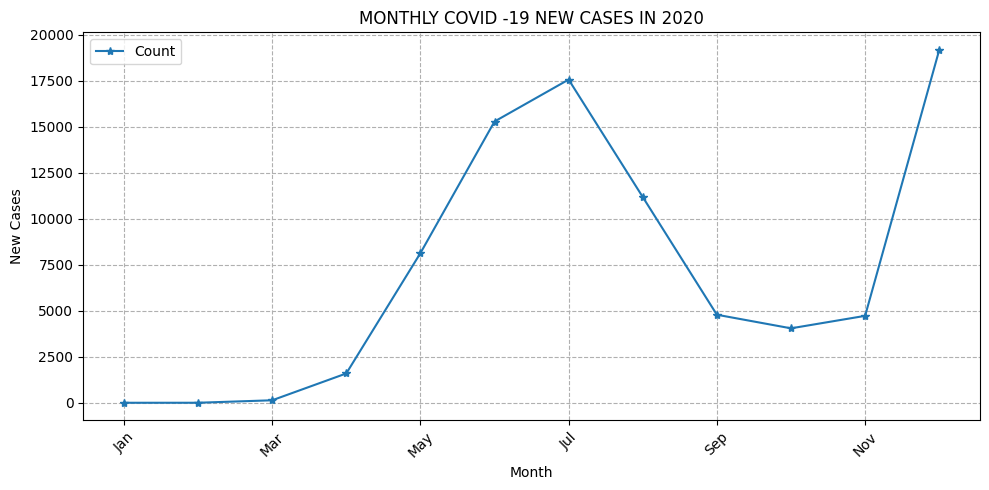

In [17]:
plot_2020=plot_months(Covid_2020_MonthlyTrend,2020)

__COVID TREND FOR 2021__

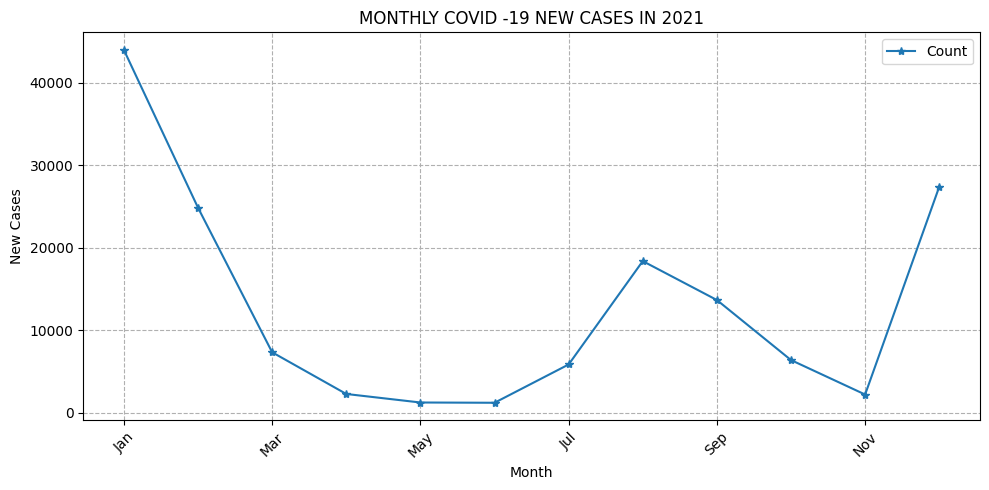

In [18]:
plot_2021=plot_months(Covid_2021_MonthlyTrend,2021)

__COVID TREND FOR 2022__

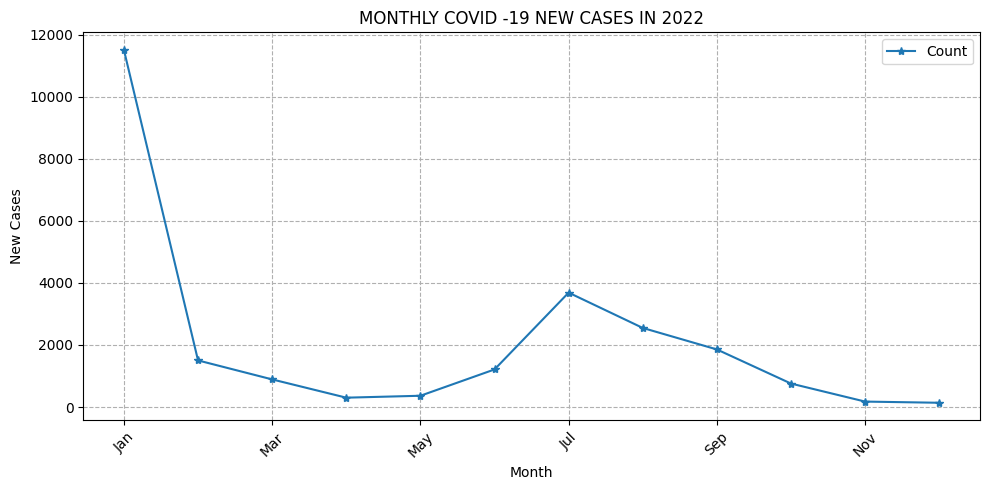

In [19]:
plot_2022=plot_months(Covid_2022_MonthlyTrend,2022)

__COVID TREND FOR 2023__

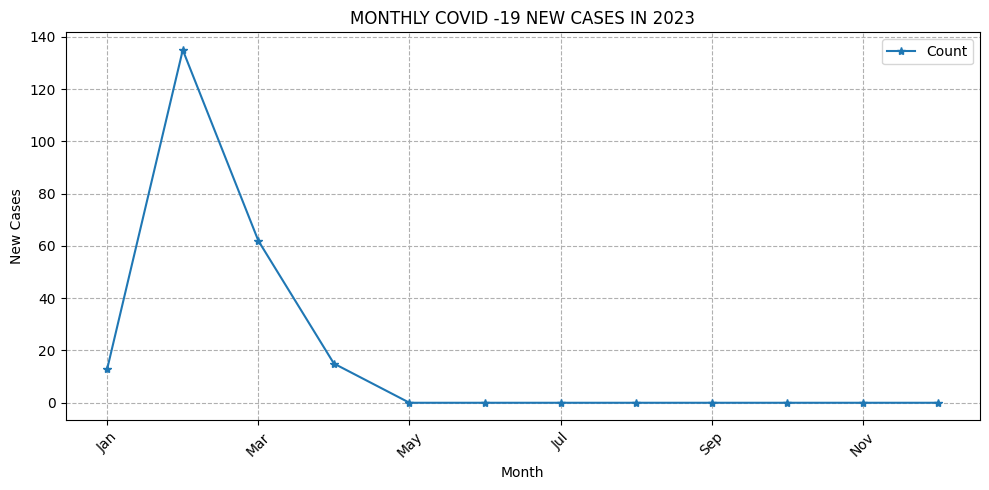

In [20]:
plot_2023=plot_months(Covid_2023_MonthlyTrend,2023)

In [21]:
cases_2020 = grouped_months(Covid_2020)['Count'].tolist()
cases_2021 = grouped_months(Covid_2021)['Count'].tolist()
cases_2022 = grouped_months(Covid_2022)['Count'].tolist()
cases_2023 = grouped_months(Covid_2023)['Count'].tolist()


In [22]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data={
    'Year':[],
    'months':[],
    'New_Cases':[]
}

__COMPILED TREND__

In [23]:
for year, values in zip(
    [2020,2021,2022,2023], [cases_2020,cases_2021,cases_2022,cases_2023]
):
    data['Year'].extend([year]*len(month))
    data['months'].extend(month)
    data['New_Cases'].extend(values)

compiledData=pd.DataFrame(data)

In [24]:
compiledTrend=compiledData.pivot_table(columns='Year',index='months',values='New_Cases')

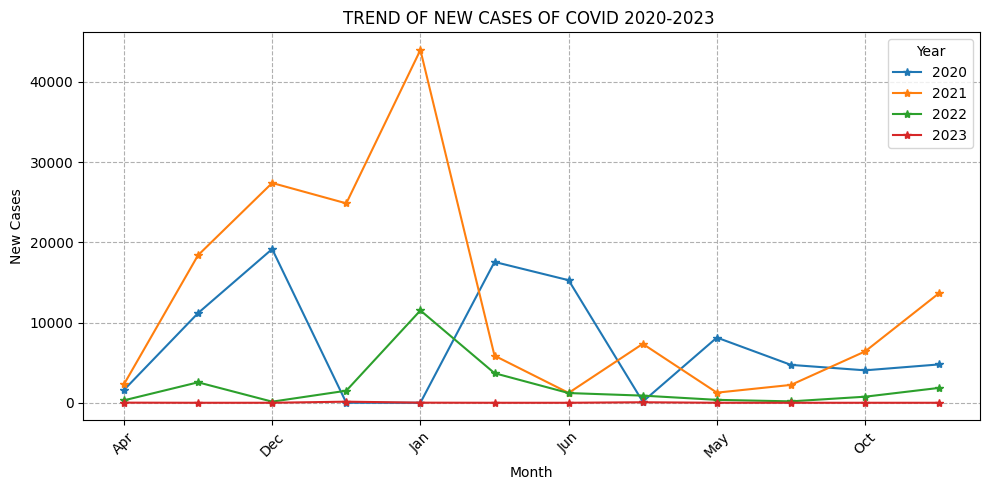

In [25]:

compiledTrendChart=compiledTrend.plot(kind='line',marker='*',figsize=(10,5))
plt.title('TREND OF NEW CASES OF COVID 2020-2023 '),
plt.xlabel('Month'),
plt.ylabel('New Cases'),
plt.grid(True, linestyle='--'),
plt.xticks(rotation=45),
plt.tight_layout(),
plt.show()